In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#your dataset
link = '/content/drive/MyDrive/dataset/creditcard.csv'
df_inOut = pd.read_csv(link)
df_inOut.drop('Time' , axis = 1 , inplace=True )
df_inOut.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


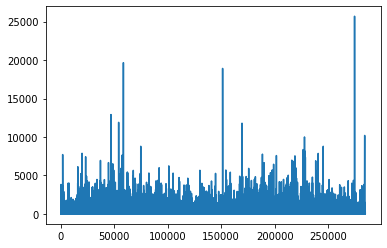

In [ ]:
#before re scaling
plt.plot(df_inOut['Amount'])

In [ ]:
# 1. If you want to add the amount column, normamlize it first between -1 and 1 before you add it , like below
def ReScale_centered(data, a):
    data_avg = data.mean()
    scaled_data = a*(data - data_avg)
    return scaled_data 

In [ ]:
df_inOut['Amount'] =  ReScale_centered(df_inOut['Amount'], 0.00001)

In [ ]:
df_inOut.shape

(284807, 30)

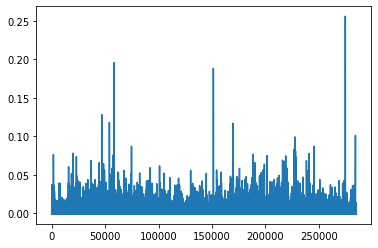

In [ ]:
#after re scaling

plt.plot(df_inOut['Amount'])

In [ ]:
df_prop  =  pd.DataFrame(df_inOut['Class'].value_counts())
df_prop

,Class
0,284315
1,492


In [ ]:
df_prop['perctage'] =  round(df_prop['Class']/sum(df_prop['Class']), 9)
df_prop

,Class,perctage
0,284315,0.998273
1,492,0.001727


In [ ]:
# the ratio is 

print( "the ratio of imbalance is  1 over" , 284315//492)


the ratio of imbalance is  1 over 577


In [ ]:
#to divide your data into while keeping a certain ratio in the training set
# def data_smart_divider(df_inOut, sample_minority , mult_factor): 
#     df_class0 =  df_inOut[df_inOut['Class'] == 0]
#     df_class1 = df_inOut[df_inOut['Class'] == 1]
#     df_train = pd.concat([df_class1.head(sample_minority) , df_class0.head(sample_minority*mult_factor)] , axis = 0)
#     df_val_test = pd.concat([df_class1.tail(len(df_class1) -sample_minority) , df_class0.tail(len(df_class0)-sample_minority*mult_factor)] , axis = 0)
#     return df_train.drop('Class' , axis=1).values , df_train['Class'].values  , df_val_test.drop('Class' , axis=1 ).values , df_val_test['Class'].values 

In [ ]:
#to try, run this 
#X_train, y_train , X_test , y_test =  data_smart_divider( df_inOut , 100 , 1000)

In [ ]:
#print(X_train.shape, y_train.shape , X_test.shape , y_test.shape)

(100100, 28) (100100,) (184707, 28) (184707,)


In [ ]:
df_inOut['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df_inOut[df_inOut['Class'] == 0].tail(500).shape

(500, 30)

In [ ]:
def data_smart_divider_TrainValidTest(df_inOut, sample_minority , mult_factor , n_valid_samples, n_test_samples): 
    df_class0 =  df_inOut[df_inOut['Class'] == 0]
    df_class1 = df_inOut[df_inOut['Class'] == 1]
    
    df_test_0 = df_inOut[df_inOut['Class'] == 0].tail(n_test_samples)
    df_test_1 = df_inOut[df_inOut['Class'] == 1].tail(n_test_samples)
    df_test =  pd.concat([df_test_0 , df_test_1] , axis = 0)
    
    df_all_withoutTest_0 = df_class0.head(len(df_class0) - n_test_samples)
    df_all_withoutTest_1 = df_class1.head(len(df_class1) - n_test_samples) 
    df_all_withoutTest =  pd.concat([df_all_withoutTest_0 , df_all_withoutTest_1] , axis = 0)
    
    df_valid_0 = df_all_withoutTest[df_all_withoutTest['Class'] == 0].tail(n_valid_samples)
    df_valid_1 = df_all_withoutTest[df_all_withoutTest['Class'] == 1].tail(n_valid_samples)
    df_valid =  pd.concat([df_valid_0 , df_valid_1] , axis = 0)
    
    df_all_withoutTestValid_0  = df_all_withoutTest_0.head(len(df_all_withoutTest_0) - n_valid_samples)
    df_all_withoutTestValid_1  = df_all_withoutTest_1.head(len(df_all_withoutTest_1) - n_valid_samples)
    
    df_train = pd.concat([df_all_withoutTestValid_1.head(sample_minority) , df_all_withoutTestValid_0.head(sample_minority*mult_factor)] , axis = 0)
    
    x_train , y_train = df_train.drop('Class' , axis=1).values, df_train['Class'].values
    x_valid , y_valid = df_valid.drop('Class' , axis=1 ).values, df_valid['Class'].values
    x_test , y_test   = df_test.drop('Class' , axis=1 ).values , df_test['Class'].values
    
    return   x_train , y_train   ,  x_valid , y_valid   , x_test , y_test 

In [ ]:
x_train , y_train   ,  x_valid , y_valid   , x_test , y_test  = data_smart_divider_TrainValidTest(df_inOut, 300 , 50 , 92, 100)

In [ ]:
print(x_train.shape , y_train.shape   ,  x_valid.shape , y_valid.shape   , x_test.shape , y_test.shape )

(15300, 29) (15300,) (184, 29) (184,) (200, 29) (200,)


In [ ]:
# def data_smart_divider(df_inOut, sample_minority , mult_factor): 
#     df_class0 =  df_inOut[df_inOut['Class'] == 0]
#     df_class1 = df_inOut[df_inOut['Class'] == 1]
#     df_train = pd.concat([df_class1.head(sample_minority) , df_class0.head(sample_minority*mult_factor)] , axis = 0)
#     df_val_test = pd.concat([df_class1.tail(len(df_class1) -sample_minority) , df_class0.tail(len(df_class0)-sample_minority*mult_factor)] , axis = 0)
#     return df_train.drop('Class' , axis=1).values , df_train['Class'].values  , df_val_test.drop('Class' , axis=1 ).values , df_val_test['Class'].values 

In [ ]:

# our network
import torch
import torch.nn as nn
import torch.nn.functional as F


class NanaNet(nn.Module):

    def __init__(self, n_neurons_1layer , n_neurons_2layer):
        super(NanaNet, self).__init__()
        self.fc1 = nn.Linear( 29, n_neurons_1layer , bias =  False) 
        self.fc2 = nn.Linear(n_neurons_1layer,n_neurons_2layer,bias =  False)
        self.fc3 = nn.Linear(n_neurons_2layer,n_neurons_2layer,bias =  False)
        self.bnn1 = nn.BatchNorm1d(n_neurons_1layer)
        self.bnn2 = nn.BatchNorm1d(n_neurons_2layer)
        self.fc4 = nn.Linear(n_neurons_2layer , 2,bias =  False ) 
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        x = torch.relu(self.fc1(x)) #dense( 28 , 40)
        x = self.bnn1(x) #batchnorm(40)
        x =  self.dropout(x) #dropout(40)
        x = torch.relu(self.fc2(x)) #dense(40, 50)
        x = self.bnn2(x)#batchnorm(50)
        x =  self.dropout(x)  #dropout(50)
        x = torch.relu(self.fc3(x)) #dense(50, 50)
        x = self.bnn2(x) #batchnorm(50)
        x =  self.dropout(x)   #dropout(50)
        #out_ = torch.sigmoid(self.fc3(x))
    
        out_ = torch.sigmoid(self.fc4(x))  #dense(50, 2)
        output =  torch.softmax(out_, dim=1)
        return output #out_ 

    
n_neurons_1layer , n_neurons_2layer = 40 , 60

nana_reseau = NanaNet(n_neurons_1layer , n_neurons_2layer)

print(nana_reseau)

NanaNet(
  (fc1): Linear(in_features=29, out_features=150, bias=False)
  (fc2): Linear(in_features=150, out_features=160, bias=False)
  (fc3): Linear(in_features=160, out_features=160, bias=False)
  (bnn1): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bnn2): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=160, out_features=2, bias=False)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [ ]:
#the BCE Loss
def my_cross_entropy(y_pred, y_true):
    log_loss=torch.mean(-1*(y_true*torch.log(y_pred[:,1]) + (1-y_true)*torch.log(1-y_pred[:,1])))
    return log_loss

### # be careful on which loss to choose


In [ ]:
#this loss has the absolute value
def KD_fromStudent_loss(y_pred, y_true, degree_freedom):
    #to set the KD_Loss 
    kl_loss_formula = nn.KLDivLoss(reduction="sum")
    
    #to transformed the distribution and fit the student t
    pdf_y_pred_dist_0 = torch.tensor(t.pdf(y_pred[:,0].detach().numpy(), df=degree_freedom))
    pdf_y_pred_dist_1 = torch.tensor(t.pdf(y_pred[:,1].detach().numpy(), df=degree_freedom))
    
    #to  compute the  two KD_Loss
    kd_loss_p1_on_p0 = torch.abs(kl_loss_formula(pdf_y_pred_dist_0, torch.abs(pdf_y_pred_dist_1)))
    kd_loss_p0_on_p1 =  torch.abs(kl_loss_formula(torch.abs(pdf_y_pred_dist_1), torch.abs(pdf_y_pred_dist_0)))
    #the mean divergence (if it does not help in the learning, you can cancel it)
    
    #the BCE Loss
    log_loss = torch.mean(-1*(y_true*torch.log(y_pred[:,1]) + (1-y_true)*torch.log(1-y_pred[:,1])))
    
    result =  (0.5/2)*(kd_loss_p1_on_p0 + kd_loss_p0_on_p1) + log_loss
    return result  , pdf_y_pred_dist_0 , pdf_y_pred_dist_1

In [ ]:
#this loss does not have the absolute value

def KD_fromStudent_loss(y_pred, y_true, degree_freedom):
    kl_loss_formula = nn.KLDivLoss(reduction="batchmean")
    
    pdf_y_pred_dist_0 = torch.tensor(t.pdf(y_pred[:,0].detach().numpy(), df=degree_freedom))
    pdf_y_pred_dist_1 = torch.tensor(t.pdf(y_pred[:,1].detach().numpy(), df=degree_freedom))
    
    kd_loss_p1_on_p0 =kl_loss_formula(pdf_y_pred_dist_0, torch.abs(pdf_y_pred_dist_1))
    kd_loss_p0_on_p1 =  kl_loss_formula(torch.abs(pdf_y_pred_dist_1), torch.abs(pdf_y_pred_dist_0))
    
    log_loss = torch.mean(-1*(y_true*torch.log(y_pred[:,1]) + (1-y_true)*torch.log(1-y_pred[:,1])))
    result =  (0.5/2)*(kd_loss_p1_on_p0 + kd_loss_p0_on_p1) + log_loss
    return result  , pdf_y_pred_dist_0 , pdf_y_pred_dist_1

In [ ]:
def KD_fromStudent_loss_1(y_pred, y_true, degree_freedom_0 ,degree_freedom_1 ):
    #to set the KD_Loss 
    lambda_md  =  0.001
    lambda_kl = 0.001
    kl_loss_formula = nn.KLDivLoss(reduction="batchmean")
    
    #to transformed the distribution and fit the student t
    pdf_y_pred_dist_0 = torch.tensor(t.pdf(y_pred[:,0].detach().cpu().numpy(), df=degree_freedom_0)) #permute 0 par 1 et vice versa
    pdf_y_pred_dist_1 = torch.tensor(t.pdf(y_pred[:,1].detach().cpu().numpy(), df=degree_freedom_1))
    
    #to  compute the  two KD_Loss
    kd_loss_p1_on_p0 = torch.abs(kl_loss_formula(pdf_y_pred_dist_0, torch.abs(pdf_y_pred_dist_1)))
    kd_loss_p0_on_p1 =  torch.abs(kl_loss_formula(torch.abs(pdf_y_pred_dist_1), torch.abs(pdf_y_pred_dist_0)))
    #the mean divergence (if it does not help in the learning, you can cancel it)
    mean_divergence_term = lambda_md * torch.abs(  1/2  - torch.mean(y_pred[:,1]))**2
    #the BCE Loss
    log_loss =  torch.mean(-1*(y_true*torch.log(y_pred[:,1]) + (1-y_true)*torch.log(1-y_pred[:,1])))
    
    result =  (lambda_kl/2)*(kd_loss_p1_on_p0 + kd_loss_p0_on_p1) + log_loss + (lambda_md/2)*mean_divergence_term
    return result  , pdf_y_pred_dist_0 , pdf_y_pred_dist_1 

In [ ]:
#if you testyout code just for one sample . you can play around with the degree of freedom adn see how it helps or not
# for i , j in enumerate(range(1,50)):
#     print("df = ", i , KD_fromStudent_loss(out_ , label.float() , j))

df =  0 tensor(1.7244, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  1 tensor(1.8121, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  2 tensor(1.8458, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  3 tensor(1.8635, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  4 tensor(1.8745, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  5 tensor(1.8819, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  6 tensor(1.8873, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  7 tensor(1.8913, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  8 tensor(1.8945, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  9 tensor(1.8970, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  10 tensor(1.8991, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  11 tensor(1.9008, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  12 tensor(1.9023, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  13 tensor(1.9036, dtype=torch.float64, grad_fn=<AddBackward0>)
df =  14 tensor(1.9047, dtype=torch.float64,

In [ ]:
X_train.shape , y_train.shape   ,  X_valid.shape , y_valid.shape   , X_test.shape , y_test.shape

((30300, 29), (30300,), (184, 29), (184,), (200, 29), (200,))

In [ ]:
import torch
import torch.nn as nn
import argparse
import numpy as num
import pandas as pds
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

#X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2,random_state = 42)
# X_train, y_train , X_test , y_test =  data_smart_divider( df_inOut , 100 , 100)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train ,test_size = 0.2,random_state = 42)
X_train , y_train   ,  X_valid , y_valid   , X_test , y_test  = data_smart_divider_TrainValidTest(df_inOut, 300 , 50 , 92, 100)                                                                            
# create feature and targets tensor for train set
featuresTrain = torch.from_numpy(X_train)
targetsTrain = torch.from_numpy(y_train)#.type(torch.LongTensor) 
                                                                            
# create feature and targets tensor for valid set
featuresValid = torch.from_numpy(X_valid)
targetsValid= torch.from_numpy(y_valid)#.type(torch.LongTensor) 

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(X_test)
targetsTest = torch.from_numpy(y_test)#.type(torch.LongTensor) 

# batch_size, epoch and iteration
batch_size = 10
n_iters = 100
num_epochs = n_iters / (len(featuresTrain) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
valid =  torch.utils.data.TensorDataset(featuresValid, targetsValid)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)


In [ ]:
len(valid_loader)

19

In [ ]:
len(test_loader)

20

In [ ]:
def traindata(device, model, epochs, optimizer, loss_function, train_loader, valid_loader , test_loader , batch_size):
    # Early stopping
    last_loss = 100
    patience = epochs//2
    triggertimes = 0
    
    prec_min_train,prec_max_train = [],[] 
    prec_min_val, prec_max_val = [],[] 
    dic_scores = dict()
    #dic_prec_val = dict()
    
    f1_score_train, f1_score_val = [],[] 
    
    
    train_losses = []
    val_losses  = []
    
    
    distribs_0  = []
    distribs_1 = []
    
    tr_accies = []
    val_accies = []
    
    #loss_total = 0
    for epoch in range(1, epochs+1):
        model.train()

        for times, data in enumerate(train_loader, 1):
            input = data[0].to(device)
            label = data[1].to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward and backward propagation
            #output = model(input.view(input.shape[0], -1))
#             out_ = model(input.float())
#             output = torch.softmax(out_, dim=1)
            output = model(input.float())
            
            #loss = loss_function(output[:,0], label.float())
            
            # ==================  uncomment it for modified loss
            
            loss , dist_0 , dist_1 = loss_function(output, label.float() , 40 , 60)#, label.float())
            
            # ==================  uncomment it for normal loss
            #loss  = loss_function(output[:,1], label.float())
            #loss_total += loss.item()
            
            loss.backward()
            optimizer.step()

            # Show progress
            if times % 100 == 0 or times == len(train_loader):
                print('[{}/{}, {}/{}] loss: {:.8}'.format(epoch, epochs, times, len(train_loader), loss.item()))

        # Early stopping
        # ==================  uncomment it for modified loss
        for class_0 , class_1  in zip(dist_0.tolist() ,dist_1.tolist()) :
                distribs_0.append(class_0)
                distribs_1.append(class_1)
        #tr_loss =  loss_total / (len(train_loader)*batch_size)
        # ====================
        tr_loss , tr_acc , precision_maj_train, precision_min_train , f1score_train = validation(model, device, train_loader, batch_size , "tr_loss")
        val_loss , val_acc , precision_maj_val, precision_min_val , f1score_val  = validation(model, device, valid_loader, batch_size , "val_loss")
        
        train_losses.append(tr_loss)
        val_losses.append(val_loss)
        
        tr_accies.append(tr_acc)
        val_accies.append(val_acc)
        
        prec_min_train.append(precision_min_train)
        prec_max_train.append(precision_maj_train)
        
        prec_min_val.append(precision_min_val)
        prec_max_val.append(precision_maj_val)
        
        
        f1_score_train.append(f1score_train)
        f1_score_val.append(f1score_val)
    
    
        print('The Current train Loss:', round(tr_loss,4)   , " and the val_loss" , round(val_loss,4))

        if val_loss > last_loss:
            trigger_times += 1
            print('Trigger Times:', trigger_times)

            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                return model

        else:
            print('trigger times: 0')
            trigger_times = 0

        last_loss = val_loss
        
    te_loss, test_acc , precision_maj_test, precision_min_test, f1score_test =  validation(model, device, test_loader, batch_size, "test_loss")
    #test_accies.append(test_acc)
    #test_losses.append(te_loss)
    dic_scores['prec_min_train'] , dic_scores['prec_max_train'] = prec_min_train,prec_max_train
    dic_scores['prec_val_min'] , dic_scores['prec_val_max'] = prec_min_val,prec_max_val
    dic_scores['f1score_train'] , dic_scores['f1score_val'] = f1_score_train,f1_score_val
    dic_scores['precision_maj_test'] , dic_scores['precision_min_test'] = precision_maj_test,precision_min_test
    dic_scores['f1score_test'] = f1score_test
    return model , train_losses, val_losses ,te_loss, distribs_0 , distribs_1 , tr_accies, val_accies ,test_acc , dic_scores 


def validation(model, device, data__loader, batch_size , which_data):
    total = 0
    correct = 0
    model.eval()
    loss_total = 0
    preds , labs = [] , []
    
    # Test validation data
    with torch.no_grad():
        for data in data__loader:
            input = data[0].to(device)
            label = data[1].to(device)

            #output = model(input.view(input.shape[0], -1))
            output = model(input.float())
            #output = torch.softmax(out_, dim=1)
            loss = nn.BCELoss(reduction = 'mean')(output[:,1], label.float())
            #loss = loss_function(output[:,0], label.float())
            #loss = loss_function(output, label.float() , 5)#, label.float())
            #loss.requires_grad= True
            loss_total += loss.item()
            
            _, predicted = torch.max(output.data, 1)

            total += label.size(0)
            correct += (predicted == label).sum().item()
            
            #for i in range(3):
            for pred_ , obs_  in zip(predicted.tolist() ,label.tolist()) :
                preds.append(pred_)
                labs.append(obs_)
    f1score =  f1_score(np.array(labs), np.array(preds) )
    conf_mat =  confusion_matrix(np.array(labs), np.array(preds) )
    loss__ =  loss_total / (len(data__loader)*batch_size)
    precision_maj = conf_mat[0][0] / conf_mat[0].sum()
    precision_min = conf_mat[1][1] / conf_mat[1].sum()
    print("====================")
    print(which_data ," = " , round(loss__,5) )
    print('Accuracy = ', round(correct / total , 5))
    print('f1_score = ', round(f1score , 5))
    print('conf_mat = ', conf_mat)
    print("precision_maj = ",round(precision_maj , 4))
    print("precision_min = ",round(precision_min , 4))
    print("====================")
    
    return loss__ , correct / total , precision_maj, precision_min , f1score




def main(epochs, batch_size):
    # GPU device
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    print('Device state:', device)

    
    batch_size = batch_size
    lr = 0.001
    #loss_function = nn.NLLLoss()
    #loss_function = nn.BCELoss()
    loss_function =  KD_fromStudent_loss_1
    model = nana_reseau.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model , tr_losses ,val_losses, test_loss, distribs_0 , distribs_1 , tr_accies, val_accies ,test_accies , dic_scores = traindata(device, model, epochs, optimizer, loss_function, train_loader, valid_loader, test_loader , batch_size)
    #t_loss = test(device, model, test_loader)
    return tr_losses ,val_losses, test_loss, distribs_0 , distribs_1, tr_accies, val_accies , test_accies ,dic_scores#, t_loss

# if __name__ == '__main__':
#     main()
## Mention the epochs here below
epochs = 20

train_losses ,  val_losses , test_loss, distribs_0 , distribs_1 , tr_accies , val_accies ,test_accies , dic_scores =  main(epochs, batch_size)

Device state: cpu
[1/20, 100/1530] loss: 0.31374196
[1/20, 200/1530] loss: 0.31374196
[1/20, 300/1530] loss: 0.31374196
[1/20, 400/1530] loss: 0.31374196
[1/20, 500/1530] loss: 0.31374198
[1/20, 600/1530] loss: 0.31374196
[1/20, 700/1530] loss: 0.31374196
[1/20, 800/1530] loss: 0.41374198
[1/20, 900/1530] loss: 0.31374196
[1/20, 1000/1530] loss: 0.31374196
[1/20, 1100/1530] loss: 0.31374196
[1/20, 1200/1530] loss: 0.31374196
[1/20, 1300/1530] loss: 0.31374196
[1/20, 1400/1530] loss: 0.31374196
[1/20, 1500/1530] loss: 0.31374196
[1/20, 1530/1530] loss: 0.31374196
tr_loss  =  0.03204
Accuracy =  0.99333
f1_score =  0.8125
conf_mat =  [[14977    23]
 [   79   221]]
precision_maj =  0.9985
precision_min =  0.7367
val_loss  =  0.04674
Accuracy =  0.83696
f1_score =  0.80519
conf_mat =  [[92  0]
 [30 62]]
precision_maj =  1.0
precision_min =  0.6739
The Current train Loss: 0.032  and the val_loss 0.0467
trigger times: 0
[2/20, 100/1530] loss: 0.31374196
[2/20, 200/1530] loss: 0.31374196
[2/2

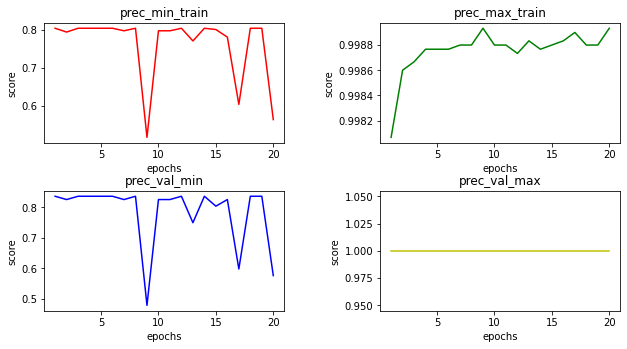

In [ ]:
colors = ['r' , 'g' , 'b' , 'y']
plt.figure(figsize=(10,5))
for i , j ,col in  zip(range(4) , list(dic_scores.keys())[:4] , colors):
    plt.subplot(2,2,i+1)
    plt.plot(range(1, epochs+1) ,dic_scores[j] , col)
    plt.xlabel('epochs')
    plt.ylabel('score')
    plt.title(j )#"precision "+ j[5:8]+ ' class '+ j[-5:] )

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

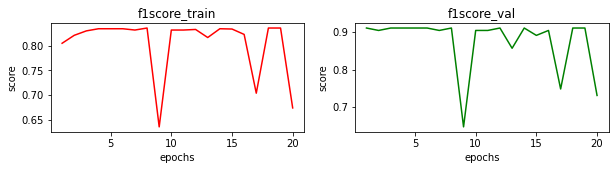

In [ ]:
fscores = ["f1score_train" , "f1score_val"]
colors = ['r' , 'g']
plt.figure(figsize=(10,2))
for i , j ,col in  zip(range(2) , fscores , colors):
    plt.subplot(1,2,i+1)
    plt.plot(range(1, epochs+1) ,dic_scores[j] , col)
    plt.xlabel('epochs')
    plt.ylabel('score')
    plt.title(j )#"precision "+ j[5:8]+ ' class '+ j[-5:] )

#plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

In [ ]:
vv[0].sum()

2

In [ ]:
tr_accies

[0.9912820512820513,
 0.9921794871794872,
 0.9917948717948718,
 0.992051282051282,
 0.992051282051282,
 0.9921794871794872,
 0.9921794871794872,
 0.992051282051282,
 0.9917948717948718,
 0.9921794871794872]

In [ ]:
for data in train_loader:
            input = data[0]#.to(device)
            label = data[1]#.to(device)

In [ ]:
label

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
out_ = nana_reseau(input.float())
#out_ = model(input.float())
output = torch.softmax(out_, dim=1)


In [ ]:
out_

tensor([[1.0000e+00, 1.8938e-16],
        [1.0000e+00, 1.0066e-17],
        [1.0000e+00, 2.9741e-18],
        [1.0000e+00, 7.5970e-15],
        [1.0000e+00, 9.4894e-14],
        [1.0000e+00, 5.4042e-16],
        [1.0000e+00, 1.0687e-14],
        [1.0000e+00, 7.6077e-16],
        [1.0000e+00, 7.6991e-14],
        [1.0000e+00, 4.5149e-15]], grad_fn=<SigmoidBackward0>)

In [ ]:
output

tensor([[0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7311, 0.2689]], grad_fn=<SoftmaxBackward0>)

In [ ]:
loss = nn.BCELoss(reduction = 'mean')(output[:,1], label.float())

In [ ]:
input.shape

torch.Size([10, 29])

In [ ]:
label.float()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
nn.BCELoss()(output[:,1] , label.float())

tensor(0.7168, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
output.data

tensor([[9.9996e-01, 3.6853e-05],
        [1.0000e+00, 3.5213e-06],
        [9.9999e-01, 7.8410e-06],
        [1.0000e+00, 4.5457e-06],
        [9.9997e-01, 3.2269e-05]])

In [ ]:
output

tensor([[9.9996e-01, 3.6853e-05],
        [1.0000e+00, 3.5213e-06],
        [9.9999e-01, 7.8410e-06],
        [1.0000e+00, 4.5457e-06],
        [9.9997e-01, 3.2269e-05]], grad_fn=<SoftmaxBackward0>)

Text(0.5, 1.0, 'distribution class_0')

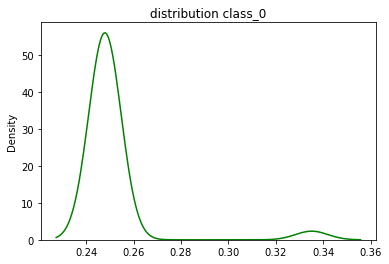

In [ ]:
import seaborn as sns
sns.kdeplot( distribs_0 , color= 'green')
plt.title('distribution class_0')


Text(0.5, 1.0, 'distribution class_1')

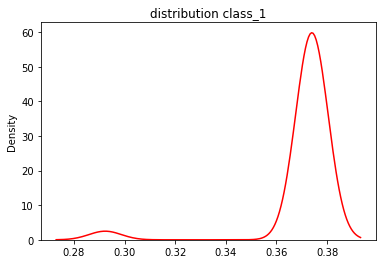

In [ ]:
sns.kdeplot(distribs_1 , color= 'red')
plt.title('distribution class_1')


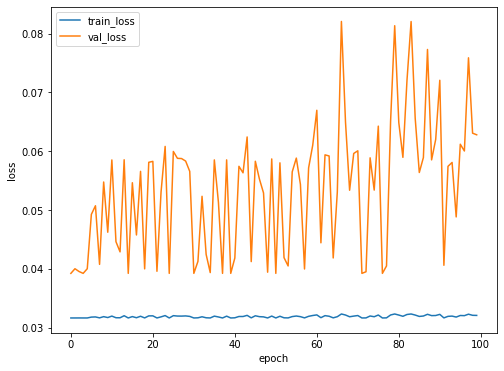

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(train_losses ,label =  "train_loss")
plt.xlabel('epoch')
plt.plot(val_losses , label =  "val_loss")
plt.ylabel('loss')
plt.legend()

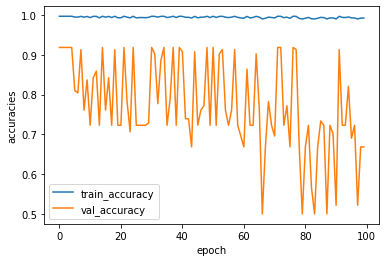

In [ ]:
plt.plot(tr_accies ,label =  "train_accuracy")
plt.xlabel('epoch')
plt.plot(val_accies , label =  "val_accuracy")
plt.ylabel('accuracies')
plt.legend()

In [ ]:
 for times, data in enumerate(train_loader, 1):
            input = data[0]#.to(device)
            label = data[1]#.to(device)

In [ ]:
for times, data in enumerate(train_loader, 1):
    print(data[0].shape)

torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])
torch.Size([5, 29])


In [ ]:
input.shape , label.shape

(torch.Size([6, 29]), torch.Size([6]))

In [ ]:
label

tensor([0, 0, 0, 0, 0])

In [ ]:
output = nana_reseau(input.float())

In [ ]:
output

tensor([[0.5040, 0.5598],
        [0.5764, 0.7851],
        [0.7406, 0.2858],
        [0.2786, 0.3149],
        [0.2666, 0.6240]], grad_fn=<SigmoidBackward0>)

In [ ]:
output.shape

torch.Size([6, 2])

In [ ]:
xx = torch.rand(2,4)
xx

tensor([[0.1448, 0.3461, 0.8718, 0.2634],
        [0.0283, 0.9726, 0.1090, 0.4438]])

In [ ]:
a, b = torch.max(output.data, 1)

In [ ]:
b

tensor([0, 0, 0, 0, 1, 0])

In [ ]:
torch.max(output.data, 1)

torch.return_types.max(
values=tensor([0.5380, 0.5257, 0.5939, 0.5149, 0.5627, 0.5323]),
indices=tensor([0, 0, 1, 1, 0, 1]))

In [ ]:
torch.max?

In [ ]:
torch.sum(output , 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

In [ ]:
torch.sum(output[0, :])

tensor(1., grad_fn=<SumBackward0>)

In [ ]:
log_loss =  torch.mean(-1*(label*torch.log(output[:,1]) + (1-label)*torch.log(1-output[:,1])))
log_loss

tensor(1.6999e-05, grad_fn=<MeanBackward0>)

In [ ]:
nn.BCELoss()(output[:,1] , label.float())

tensor(1.6999e-05, grad_fn=<BinaryCrossEntropyBackward0>)